# TODO

* Analisar o casamento dos itinerários no código:
    Itinerários com maiores diferenças: 161,248,255
    
* Validar a saída: investigar porque existe mais de uma linha com horários iguais.

# Bus Trips Analysis
## Questões
1 - Qual a diferença entre o embarque no primeiro e o segundo ? 
2 - Considerando a baldeação qual a quantidade de viagens em que a diferença entre o primeiro e o segundo ônibus é maior que 70 minutos ?
3 - Qual o horário em que as baldeações ultrapassam 70 minutos ?
4 - Quais são as provavéis causas para os atrasos ? O período de descanso dos motoristas(intervalo) influencia nos atrasos ? Nos horários de pico existem atrasos ? Nestes mesmos horários a quantidade de ônibus aumenta ?

Importação de depêndencias

In [48]:
#Libraries

#Python Libs
import sys
import os
import glob
import traceback
from datetime import datetime
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


#Data Analysis Libs
import pandas as pd
import numpy as np

Importação de arquivo csv e visualização das principais colunas

In [49]:
bus_itineraries = pd.read_csv('data/output/output_2019_02_02.csv')
bus_itineraries

,otp_user_trip_id,otp_itinerary_id,otp_leg_id,otp_mode,otp_route,bt_bus_code,bt_trip_num,otp_from_stop_id,otp_start_time,bt_start_time,sched_obs_start_timediff,otp_to_stop_id,otp_end_time,bt_end_time,sched_obs_end_timediff,otp_duration_mins,bt_duration_mins
0,385703.0,1,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 01:31:17,NaN,NaN,NaN,2019-02-02 01:41:05,2019-02-02 00:00:00,NaN,9.800000,NaN
1,385703.0,2,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 05:58:24,2019-02-02 06:58:20,NaN,NaN,2019-02-02 05:58:28,2019-02-02 06:58:20,NaN,0.066667,NaN
2,385703.0,2,2,BUS,090B,4002.0,1.0,385703.0,2019-02-02 05:58:29,2019-02-02 06:58:20,0 days 00:59:51,386613.0,2019-02-02 05:59:52,2019-02-02 07:00:01,0 days 01:00:09,1.383333,1.683333
3,385703.0,2,3,WALK,NaN,NaN,NaN,NaN,2019-02-02 05:59:53,2019-02-02 07:00:01,NaN,NaN,2019-02-02 06:05:12,2019-02-02 07:05:01,NaN,5.316667,NaN
4,385703.0,3,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:16:24,2019-02-02 06:58:20,NaN,NaN,2019-02-02 06:16:28,2019-02-02 06:58:20,NaN,0.066667,NaN
5,385703.0,3,2,BUS,090B,4002.0,1.0,385703.0,2019-02-02 06:16:29,2019-02-02 06:58:20,0 days 00:41:51,386613.0,2019-02-02 06:17:52,2019-02-02 07:00:01,0 days 00:42:09,1.383333,1.683333
6,385703.0,3,3,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:17:53,2019-02-02 07:00:01,NaN,NaN,2019-02-02 06:23:12,2019-02-02 07:05:01,NaN,5.316667,NaN
7,385703.0,4,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:33:24,2019-02-02 06:58:20,NaN,NaN,2019-02-02 06:33:28,2019-02-02 06:58:20,NaN,0.066667,NaN
8,385703.0,4,2,BUS,090B,4002.0,1.0,385703.0,2019-02-02 06:33:29,2019-02-02 06:58:20,0 days 00:24:51,386613.0,2019-02-02 06:34:52,2019-02-02 07:00:01,0 days 00:25:09,1.383333,1.683333
9,385703.0,4,3,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:34:53,2019-02-02 07:00:01,NaN,NaN,2019-02-02 06:40:12,2019-02-02 07:05:01,NaN,5.316667,NaN


In [50]:
#dropped = bus_itineraries.drop_duplicates(keep='first',subset=['otp_leg_id','otp_mode','otp_route','bt_bus_code','bt_trip_num', 'otp_from_stop_id','otp_start_time','bt_start_time',
                #'sched_obs_start_timediff','otp_to_stop_id','otp_end_time','bt_end_time','sched_obs_end_timediff'])

#dropped

In [51]:
#groupped1 = dropped.groupby(['otp_user_trip_id','otp_itinerary_id']).filter(lambda g: len(g.otp_leg_id) == 5)
#groupped1

In [52]:


#grouped = groupped1.groupby(['otp_user_trip_id','otp_itinerary_id']) \
 #                                   .agg({'otp_leg_id': lambda x: len(x) < 5})

In [53]:
bus_itineraries[['otp_itinerary_id',"otp_leg_id","otp_mode", "otp_start_time","otp_end_time", "bt_start_time","bt_end_time", "bt_duration_mins"]].head()

,otp_itinerary_id,otp_leg_id,otp_mode,otp_start_time,otp_end_time,bt_start_time,bt_end_time,bt_duration_mins
0,1,1,WALK,2019-02-02 01:31:17,2019-02-02 01:41:05,NaN,2019-02-02 00:00:00,NaN
1,2,1,WALK,2019-02-02 05:58:24,2019-02-02 05:58:28,2019-02-02 06:58:20,2019-02-02 06:58:20,NaN
2,2,2,BUS,2019-02-02 05:58:29,2019-02-02 05:59:52,2019-02-02 06:58:20,2019-02-02 07:00:01,1.683333
3,2,3,WALK,2019-02-02 05:59:53,2019-02-02 06:05:12,2019-02-02 07:00:01,2019-02-02 07:05:01,NaN
4,3,1,WALK,2019-02-02 06:16:24,2019-02-02 06:16:28,2019-02-02 06:58:20,2019-02-02 06:58:20,NaN


In [54]:
#filtered_sched_obs_start_time = bus_itineraries.sched_obs_start_timediff.dropna()
#mean = filtered_sched_obs_start_time.apply(lambda x: np.mean(x))
#parsed_sched_obs_start_time = filtered_sched_obs_start_time.apply(lambda x : x/pd.Timedelta('1m'))

#filtered_sched_obs_end_time = bus_itineraries.sched_obs_end_timediff.dropna()
#mean = filtered_sched_obs_start_time.apply(lambda x: np.mean(x))
#parsed_sched_obs_end_time = filtered_sched_obs_end_time.apply(lambda x : x/pd.Timedelta('1m'))

#diff_trip_time = parsed_sched_obs_end_time - parsed_sched_obs_start_time

#diff_trip_time

## Duração total da viagem observada

In [55]:
bt_duration_mins = bus_itineraries.bt_duration_mins.dropna()

In [56]:
bt_duration_mins.describe()

count    335.000000
mean       9.505920
std        9.941905
min        0.200000
25%        2.808333
50%        6.633333
75%       11.750000
max       38.566667
Name: bt_duration_mins, dtype: float64

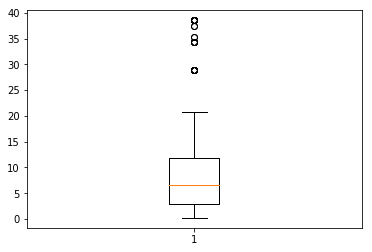

In [57]:
plt.boxplot(bt_duration_mins)
plt.show()

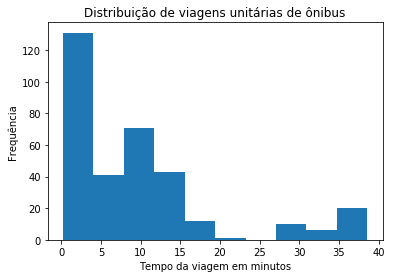

<Figure size 720x360 with 0 Axes>

In [58]:
plt.hist(bt_duration_mins)
plt.title(u'Distribuição de viagens unitárias de ônibus')
plt.xlabel(u'Tempo da viagem em minutos')
plt.ylabel(u'Frequência')
plt.figure(figsize=(10,5))
plt.show()

In [59]:
df = bus_itineraries

In [60]:
df.groupby(['otp_user_trip_id']).apply(lambda x: str(x['bt_start_time']))
#df.groupby(['otp_user_trip_id']).apply(lambda x: pd.to_datetime(x['bt_start_time']))
df.bt_start_time.dtype
df.size


17102

In [61]:
df.columns

Index([u'otp_user_trip_id', u'otp_itinerary_id', u'otp_leg_id', u'otp_mode',
       u'otp_route', u'bt_bus_code', u'bt_trip_num', u'otp_from_stop_id',
       u'otp_start_time', u'bt_start_time', u'sched_obs_start_timediff',
       u'otp_to_stop_id', u'otp_end_time', u'bt_end_time',
       u'sched_obs_end_timediff', u'otp_duration_mins', u'bt_duration_mins'],
      dtype='object')

In [62]:
df

,otp_user_trip_id,otp_itinerary_id,otp_leg_id,otp_mode,otp_route,bt_bus_code,bt_trip_num,otp_from_stop_id,otp_start_time,bt_start_time,sched_obs_start_timediff,otp_to_stop_id,otp_end_time,bt_end_time,sched_obs_end_timediff,otp_duration_mins,bt_duration_mins
0,385703.0,1,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 01:31:17,NaN,NaN,NaN,2019-02-02 01:41:05,2019-02-02 00:00:00,NaN,9.800000,NaN
1,385703.0,2,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 05:58:24,2019-02-02 06:58:20,NaN,NaN,2019-02-02 05:58:28,2019-02-02 06:58:20,NaN,0.066667,NaN
2,385703.0,2,2,BUS,090B,4002.0,1.0,385703.0,2019-02-02 05:58:29,2019-02-02 06:58:20,0 days 00:59:51,386613.0,2019-02-02 05:59:52,2019-02-02 07:00:01,0 days 01:00:09,1.383333,1.683333
3,385703.0,2,3,WALK,NaN,NaN,NaN,NaN,2019-02-02 05:59:53,2019-02-02 07:00:01,NaN,NaN,2019-02-02 06:05:12,2019-02-02 07:05:01,NaN,5.316667,NaN
4,385703.0,3,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:16:24,2019-02-02 06:58:20,NaN,NaN,2019-02-02 06:16:28,2019-02-02 06:58:20,NaN,0.066667,NaN
5,385703.0,3,2,BUS,090B,4002.0,1.0,385703.0,2019-02-02 06:16:29,2019-02-02 06:58:20,0 days 00:41:51,386613.0,2019-02-02 06:17:52,2019-02-02 07:00:01,0 days 00:42:09,1.383333,1.683333
6,385703.0,3,3,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:17:53,2019-02-02 07:00:01,NaN,NaN,2019-02-02 06:23:12,2019-02-02 07:05:01,NaN,5.316667,NaN
7,385703.0,4,1,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:33:24,2019-02-02 06:58:20,NaN,NaN,2019-02-02 06:33:28,2019-02-02 06:58:20,NaN,0.066667,NaN
8,385703.0,4,2,BUS,090B,4002.0,1.0,385703.0,2019-02-02 06:33:29,2019-02-02 06:58:20,0 days 00:24:51,386613.0,2019-02-02 06:34:52,2019-02-02 07:00:01,0 days 00:25:09,1.383333,1.683333
9,385703.0,4,3,WALK,NaN,NaN,NaN,NaN,2019-02-02 06:34:53,2019-02-02 07:00:01,NaN,NaN,2019-02-02 06:40:12,2019-02-02 07:05:01,NaN,5.316667,NaN


In [63]:
bus_itineraries[['otp_itinerary_id',"otp_leg_id","otp_mode", "otp_start_time","otp_end_time", "bt_start_time","bt_end_time", 
                 "bt_duration_mins", "bt_bus_code"]].head()

,otp_itinerary_id,otp_leg_id,otp_mode,otp_start_time,otp_end_time,bt_start_time,bt_end_time,bt_duration_mins,bt_bus_code
0,1,1,WALK,2019-02-02 01:31:17,2019-02-02 01:41:05,NaN,2019-02-02 00:00:00,NaN,NaN
1,2,1,WALK,2019-02-02 05:58:24,2019-02-02 05:58:28,2019-02-02 06:58:20,2019-02-02 06:58:20,NaN,NaN
2,2,2,BUS,2019-02-02 05:58:29,2019-02-02 05:59:52,2019-02-02 06:58:20,2019-02-02 07:00:01,1.683333,4002.0
3,2,3,WALK,2019-02-02 05:59:53,2019-02-02 06:05:12,2019-02-02 07:00:01,2019-02-02 07:05:01,NaN,NaN
4,3,1,WALK,2019-02-02 06:16:24,2019-02-02 06:16:28,2019-02-02 06:58:20,2019-02-02 06:58:20,NaN,NaN


In [81]:
bus_itineraries[(bus_itineraries.otp_leg_id == 4)]

,otp_user_trip_id,otp_itinerary_id,otp_leg_id,otp_mode,otp_route,bt_bus_code,bt_trip_num,otp_from_stop_id,otp_start_time,bt_start_time,sched_obs_start_timediff,otp_to_stop_id,otp_end_time,bt_end_time,sched_obs_end_timediff,otp_duration_mins,bt_duration_mins


In [64]:
bus_itineraries.describe

<bound method DataFrame.describe of       otp_user_trip_id  otp_itinerary_id  otp_leg_id otp_mode otp_route  \
0             385703.0                 1           1     WALK       NaN   
1             385703.0                 2           1     WALK       NaN   
2             385703.0                 2           2      BUS      090B   
3             385703.0                 2           3     WALK       NaN   
4             385703.0                 3           1     WALK       NaN   
5             385703.0                 3           2      BUS      090B   
6             385703.0                 3           3     WALK       NaN   
7             385703.0                 4           1     WALK       NaN   
8             385703.0                 4           2      BUS      090B   
9             385703.0                 4           3     WALK       NaN   
10            385703.0                 5           1     WALK       NaN   
11            385703.0                 5           2      BUS   

###Encontrando tempo total de um itinerário

In [82]:
#buscando a diferença entre o primeiro e segundo ônibus

itinerary_id = df.otp_itinerary_id.iloc[0] #recuperando ID da primeira linha
#gerar index out bounds
times = []
start_time_first_bus = []
start_time_second_bus = []
count = 0

for i in range(len(df)-2):
    row = df.iloc[i]
#     if (row.otp_leg_id >= 3):
#         print "aa"
    
    # considerando somente a primeira leg par de cada itinerário para cálculo do tempo de 'baldeação'
    if (row.otp_leg_id % 2 == 0 and row.otp_itinerary_id == itinerary_id 
        and df.otp_itinerary_id.iloc[i+2] == itinerary_id):
            times.append( pd.to_datetime(df.bt_start_time.iloc[i+2]) -  pd.to_datetime(df.bt_start_time.iloc[i]))
            start_time_first_bus.append(df.bt_start_time.iloc[i])
            start_time_second_bus.append(df.bt_start_time.iloc[i+2])
            
            #imprime os itinerários com maiores horários de "baldeação"
            if (pd.to_datetime(df.bt_start_time.iloc[i+2]) -  pd.to_datetime(df.bt_start_time.iloc[i]) > timedelta(minutes=100)):
                count = count+1
                print(row.otp_itinerary_id)
        
                
            
    itinerary_id = row.otp_itinerary_id
print count

0


In [66]:
times

[]

In [20]:
diff_bus_trips = pd.DataFrame(data=times)
type(diff_bus_trips)

pandas.core.frame.DataFrame

In [21]:
teste = pd.DataFrame({
    'horarios': times,
    'primeiro_onibus': start_time_first_bus,
    'segundo_onibus': start_time_second_bus
})


scheduled_bus_times2 = teste.iloc[::2]
scheduled_bus_times2.dropna()
scheduled_bus_times2.head()

,horarios,primeiro_onibus,segundo_onibus
0,00:10:05,2019-02-01 22:17:27,2019-02-01 22:27:32
2,00:06:26,2019-02-01 22:17:27,2019-02-01 22:23:53
4,-1 days +23:41:14,2019-02-01 22:17:27,2019-02-01 21:58:41
6,-1 days +22:22:35,2019-02-01 22:17:27,2019-02-01 20:40:02
8,-1 days +23:41:14,2019-02-01 22:17:27,2019-02-01 21:58:41


In [22]:
#bus_itineraries[['otp_itinerary_id',"otp_leg_id","otp_mode", "bt_start_time"]].tail(50)

In [23]:
#retira horário em que a diferença é negativa
zero_hora = '00:10:05'
bus_times = diff_bus_trips
#bus_times = diff_bus_trips.iloc[::2]
bus_times.columns = ['horarios']
bus_times = bus_times.loc[bus_times['horarios'] > zero_hora]
bus_times.dropna()
bus_times.head()

,horarios
1,00:58:27
10,00:49:21
14,00:58:27
16,00:49:21
19,00:58:27


In [24]:
#bus_times.to_csv('/bus_times.csv', index=False)

In [25]:
bus_times.describe()

,horarios
count,20
mean,0 days 00:49:29.150000
std,0 days 00:11:55.210920
min,0 days 00:10:23
25%,0 days 00:49:21
50%,0 days 00:49:21
75%,0 days 00:58:27
max,0 days 00:58:27


In [26]:
bus_times.dtypes

horarios    timedelta64[ns]
dtype: object

Text(0.5,1,u"Distribui\xe7\xe3o do tempo das 'baldea\xe7\xf5es'")

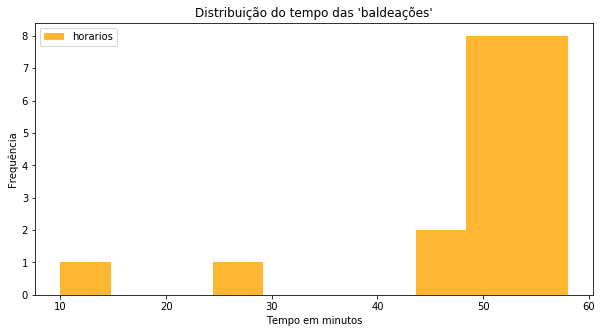

In [36]:
times_plot = bus_times.astype('timedelta64[m]').plot.hist(alpha = 0.8, figsize=(10,5),  color="orange")
times_plot.set_xlabel(u"Tempo em minutos")
times_plot.set_ylabel(u"Frequência")
times_plot.set_title(u"Distribuição do tempo das 'baldeações'")

Text(0.5,1,u'Gr\xe1fico de densidade')

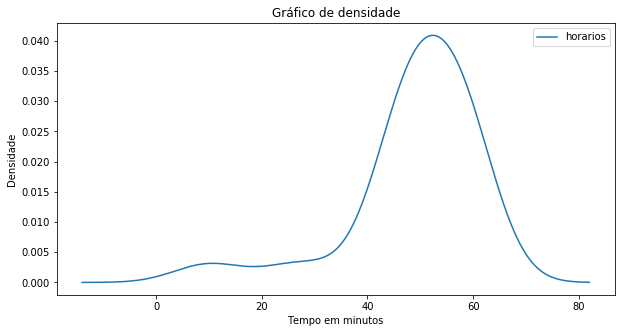

In [37]:
density_bus_times = bus_times.astype('timedelta64[m]').plot.density(figsize=(10,5))
density_bus_times.set_xlabel(u"Tempo em minutos")
density_bus_times.set_ylabel(u"Densidade")
density_bus_times.set_title(u"Gráfico de densidade")

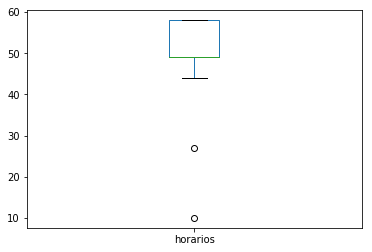

In [29]:
bus_times.astype('timedelta64[m]').plot.box()

##Análise sobre a integração temporal

- Quantos itinerários o  tempo entre embarcar no primeiro ônibuse e realizar a baldeação é menor que 70 minutos ?  

Número total de horários de ônibus após validação

In [30]:
bus_times.size

20

In [31]:
gte_70min = bus_times[bus_times.horarios > timedelta(minutes=70)]
lte_70min = bus_times[bus_times.horarios <= timedelta(minutes=70)]

Número total de itinerários que o tempo entre o primeiro e o segundo ônibus é maior que 70 minutos:

In [32]:
gte_70min.size

0

Número total de itinerários que o tempo entre o primeiro e o segundo ônibus é menor que 70 minutos:

In [33]:
lte_70min.size

20

In [34]:
#porcentagem de ônibus que estouram os 70 minutos para a integração temporal
percentage_gte = gte_70min.size / bus_times.size
percentage_gte * 100

0

In [35]:
trips_gte70 = gte_70min.astype('timedelta64[m]').plot.hist(alpha = 0.8, figsize=(10,5),  color="orange")
trips_gte70.set_xlabel("Tempo em minutos")
trips_gte70.set_ylabel("Frequência")
trips_gte70.set_title("Distribuição do tempo de espera maior que 70 minutos")

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
gte_70min.astype('timedelta64[m]').plot.box(figsize=(10,5))